### Generation

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load csv file and store data in a list
data = pd.read_csv('GT Survey 1.csv')
data.drop(columns=['Timestamp'], inplace=True)
data.drop(columns=['Name'], inplace=True)

print(data)

df = pd.DataFrame(data)
print(df)
# Convert the DataFrame to a list of lists
data_list = df.values.tolist()
print(data_list)

print(len(data_list), len(data_list[0]))
statements = data_list[0]
for i in range(1, len(data_list)):
    statements = statements + data_list[i]
print(len(statements))

   What do you think are the biggest challenges in the education system today?\nPlease give your thoughts in a sentence or two.  \
0   Education is too costly and is a product inste...                                                                             
1   Lack of direction as to where people are going...                                                                             
2   Primary Education has to be restructured to ac...                                                                             
3   Quality of education is bad, teach outdated us...                                                                             
4   Awareness is a big one and lack of guidance is...                                                                             
5   Unfit primary teachers (for most schools), con...                                                                             
6   Lack of financial cognisance and too little em...                              

In [3]:
# Hierarchical Clustering for policy statement grouping
def hierarchical_clustering(statements, num_clusters):
    # Convert statements to TF-IDF vectors
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(statements)

    # Compute cosine distances manually
    distance_matrix = cosine_distances(X)

    # Perform Agglomerative Clustering without affinity parameter (uses precomputed distance matrix)
    clustering_model = AgglomerativeClustering(n_clusters=num_clusters, metric='precomputed', linkage='average')
    labels = clustering_model.fit_predict(distance_matrix)

    # Group statements by cluster label
    clusters = defaultdict(list)
    for i, label in enumerate(labels):
        clusters[label].append(statements[i])

    return clusters

In [4]:
clusters = hierarchical_clustering(statements, num_clusters=8)

# Display clustering result
print("\nHierarchical Clustering of Policy Statements:")
for label, group in clusters.items():
    print(f"\nCluster {label + 1}:")
    for statement in group:
        print(" -", statement)


Hierarchical Clustering of Policy Statements:

Cluster 5:
 - Education is too costly and is a product instead of being a way to change your life.
 - Certainly, as mentioned above we can delegate certain unnecessarily time consuming tasks to certain online resources while we focus on the creative. Also, this will allow access to wider range of resources.

As for the distraction potential. This is life, they need to face it and get over their addictions.  Else they're sure to mess up when they no longer have a restriction placed on them in the future.
 - Programming or applied mathematics in real life
 - LLMs for Minimization of communication barrier. Deep search engines to Counter lack of resources (or clarity in resources)
 - Low barrier to entry 
 - Explaination of the concepts in practical way for better understanding which is one of the challenge and this even reduces the literacy rate and economy of country
 - By ensuring and establishing certain standards of policies that makes t

In [5]:
cluster_1 = clusters[0]
indices_1 = []
for i in range(len(cluster_1)):
    indices_1.append(statements.index(cluster_1[i]) // 12)
print("Indices of cluster 1:")
print(set(indices_1))


Indices of cluster 1:
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [8]:
GPT_candidates=["India's education policy should focus on elevating public schools through better infrastructure, trained and fairly compensated teachers, inclusive decision-making, and updated curricula that emphasize critical thinking, real-world skills, and digital access—while fostering healthy collaboration and accountability between public and private institutions to ensure equitable and high-quality education for all", "India's education policy should focus on fostering strong collaboration between academia and industry to promote hands-on, project-based learning and develop adaptable, real-world skills such as communication, critical thinking, and digital literacy", "India's education policy should focus on integrating AI and digital tools to personalize learning, support self-paced and flexible education, reduce teacher workload through automation, and foster a system that values practical learning, intrinsic motivation, and teacher quality over rigid standards and competitive exams", "India's education policy should focus on increasing awareness, ensuring access to quality standardized resources like government-approved video lectures, promoting meaningful project-based learning, and establishing a transparent body to uplift or reform substandard institutions", "India's education policy should focus on making education more affordable and life-changing by promoting practical, personalized, and early specialization in learning, integrating technology to expand access and reduce communication barriers, and replacing rote-based, standardized assessments with creative, real-world applications that nurture diverse intelligences", "India's education policy should focus on revamping primary education to prioritize core subjects like mathematics, science, and economics, while eliminating outdated content and ensuring better teaching quality", "India's education policy should focus on fostering a goal- and result-oriented system that aligns with societal and employment needs, incorporates regular curriculum updates, promotes purpose-driven learning for both students and teachers, includes inputs from industry leaders, leverages mass media for awareness, and supports individual well-being"]
Gemini_candidates = ["India's education policy should focus on improving the quality and accessibility of public education by investing in infrastructure, technology, teacher training and compensation, curriculum updates emphasizing critical thinking, problem-solving, and relevant skills, while also establishing better oversight and accountability for both public and private institutions through feedback mechanisms and potentially public-private partnerships to ensure equitable and quality education for all", "India's education policy should focus on enhanced collaboration with industry to integrate practical skills, provide real-world exposure through internships and project-based learning, and ensure the curriculum remains relevant and equips graduates with adaptable skills for the job market", "India's education policy should focus on strategically integrating AI and digital tools to personalize learning, enhance teaching effectiveness, and provide flexibility, while also prioritizing teacher quality through better compensation, rigorous selection, and continuous training, and shifting towards more practical, competency-based assessments that emphasize completion over competition", "India's education policy should focus on increasing awareness and guidance, potentially through accessible resources like cheaper internet, awareness campaigns, recorded standard lectures, government-approved video content, and establishing a quality board to address underperforming institutions and ensure standardized education", "India's education policy should focus on making education more affordable and practical, integrating technology thoughtfully, emphasizing real-world application and understanding, promoting individualized learning and assessment, and allowing for earlier specialization relevant to future career paths", "India's education policy should focus on modernizing the curriculum with an emphasis on mathematics, science, economics, English, logical reasoning, and practical skills while improving teacher quality and incorporating moral values and physical education to address outdated content and pseudoscience", "India's education policy should focus on a goal-oriented and result-oriented approach, tailored to socioeconomic needs and employment, with a focus on the 'why' of learning, frequent curriculum updates reflecting societal and job market changes, utilizing mass media for awareness, and encouraging self-care"]
Claude_candidates = ["India's education policy should focus on improving the quality of public schools through better teacher compensation, enhanced infrastructure, critical thinking-centered curricula, and digital literacy, while establishing stronger accountability mechanisms that incorporate feedback from teachers, students, and parents to create an accessible and forward-looking educational system that provides opportunities for all children regardless of socioeconomic background", "India's education policy should focus on strengthening collaboration between academic institutions and industry through internship programs, project-based learning, and co-designed curricula that balance theoretical knowledge with practical skills development, ensuring students graduate with relevant competencies for the modern workforce", "India's education policy should focus on integrating AI and digital tools as enhancement technologies that personalize learning experiences and reduce teacher burden, while improving teacher selection, training, and compensation, shifting assessment toward project-based approaches, and enabling self-paced learning that emphasizes completion over competition", "India's education policy should focus on increasing awareness through internet-accessible resources like standard-based video lectures, providing better guidance for students, developing meaningful project-based learning, and establishing a quality oversight board to improve underperforming institutions", "India's education policy should focus on creating a more practical, accessible, and personalized learning system that emphasizes real-world applications, reduces financial barriers, embraces helpful technologies, and allows for earlier specialization in relevant skills rather than standardized testing of unrelated subjects", "India's education policy should focus on modernizing the curriculum with greater emphasis on mathematics, science, and practical skills while improving teaching quality to address the current outdated system", "India's education policy should focus on goal-oriented learning that aligns curriculum with socioeconomic needs, emphasizes practical outcomes for employment, and adapts regularly to changing job market requirements, all while fostering student purpose and self-care"]


In [9]:
def generate_approvals(statements, candidates, threshold):
    approvals = []
    scores = {}
    for i in range(len(candidates)):
        scores[i] = 0
    # Step 1: Combine responses and candidate statements for joint TF-IDF
    all_texts = statements + candidates
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(all_texts)

    scores = {}
    for i in range(7):
        scores[i] = 0

    # Step 2: Separate TF-IDF matrices
    response_vecs = tfidf_matrix[:len(statements)]
    statement_vecs = tfidf_matrix[len(statements):]

    # Step 3: Compute cosine similarities
    similarity_matrix = cosine_similarity(response_vecs, statement_vecs)

    # Step 4: Assign approvals based on similarity threshold
    voters_preferences = defaultdict(set)

    for i, sims in enumerate(similarity_matrix):
        for j, score in enumerate(sims):
            if score >= threshold:
                voters_preferences[i].add(candidates[j])

    for _, approved in voters_preferences.items():
        for s in approved:
            scores[candidates.index(s)] += 1
    
    for i in scores:
        if scores[i] >= len(candidates) // 2:
            approvals.append(i)
    return approvals        

In [10]:
def BJR(voter_preferences, num_winners):
    # Initialize variables
    num_voters = len(voter_preferences)
    threshold = num_voters / num_winners
    group_support = defaultdict(set)

    # Compute group support for each policy
    for voter, preferences in voter_preferences.items():
        for policy in preferences:
            group_support[policy].add(voter)

    # Sort policies by number of supporters
    descending_policies = sorted(group_support.keys(), key=lambda p: len(group_support[p]), reverse=True)

    # Select policies using BJR (Ensuring each justified group gets representation)
    selected_policies = set()
    voter_covered = set()

    for policy in descending_policies:
        if len(group_support[policy]) >= threshold and not group_support[policy].issubset(voter_covered):
            selected_policies.add(policy)
            voter_covered.update(group_support[policy])
        if len(selected_policies) == num_winners:
            break

    return selected_policies


In [ ]:
GPT_preferences = {}
for i in range(len(data_list)):
    GPT_preferences[i] = generate_approvals(data_list[i], GPT_candidates, 0.06)

GPT_policies = BJR(GPT_preferences, 4)
print("GPT policies:")
for i in GPT_policies:
    print(GPT_candidates[i])

GPT policies:
India's education policy should focus on elevating public schools through better infrastructure, trained and fairly compensated teachers, inclusive decision-making, and updated curricula that emphasize critical thinking, real-world skills, and digital access—while fostering healthy collaboration and accountability between public and private institutions to ensure equitable and high-quality education for all
India's education policy should focus on fostering strong collaboration between academia and industry to promote hands-on, project-based learning and develop adaptable, real-world skills such as communication, critical thinking, and digital literacy
India's education policy should focus on increasing awareness, ensuring access to quality standardized resources like government-approved video lectures, promoting meaningful project-based learning, and establishing a transparent body to uplift or reform substandard institutions
India's education policy should focus on reva

In [12]:
Gemini_preferences = {}
for i in range(len(data_list)):
    Gemini_preferences[i] = generate_approvals(data_list[i], Gemini_candidates, 0.07)
Gemini_policies = BJR(Gemini_preferences, 4)
print("Gemini policies:")
for i in Gemini_policies:
    print(Gemini_candidates[i])

Gemini policies:
India's education policy should focus on improving the quality and accessibility of public education by investing in infrastructure, technology, teacher training and compensation, curriculum updates emphasizing critical thinking, problem-solving, and relevant skills, while also establishing better oversight and accountability for both public and private institutions through feedback mechanisms and potentially public-private partnerships to ensure equitable and quality education for all
India's education policy should focus on enhanced collaboration with industry to integrate practical skills, provide real-world exposure through internships and project-based learning, and ensure the curriculum remains relevant and equips graduates with adaptable skills for the job market
India's education policy should focus on strategically integrating AI and digital tools to personalize learning, enhance teaching effectiveness, and provide flexibility, while also prioritizing teacher 

In [13]:
Claude_preferences = {}
for i in range(len(data_list)):
    Claude_preferences[i] = generate_approvals(data_list[i], Claude_candidates, 0.06)
Claude_policies = BJR(Claude_preferences, 4)
print("Claude policies:")
for i in Claude_policies:
    print(Claude_candidates[i])

Claude policies:
India's education policy should focus on improving the quality of public schools through better teacher compensation, enhanced infrastructure, critical thinking-centered curricula, and digital literacy, while establishing stronger accountability mechanisms that incorporate feedback from teachers, students, and parents to create an accessible and forward-looking educational system that provides opportunities for all children regardless of socioeconomic background
India's education policy should focus on strengthening collaboration between academic institutions and industry through internship programs, project-based learning, and co-designed curricula that balance theoretical knowledge with practical skills development, ensuring students graduate with relevant competencies for the modern workforce
India's education policy should focus on increasing awareness through internet-accessible resources like standard-based video lectures, providing better guidance for students, 

### Validation

In [52]:
responses = pd.read_csv('GT Survey 2.csv')

responses = responses.set_axis(['GPT S1', 'Gemini S1', 'Claude S1', 'S1 pref', 'Gemini S2', 'GPT S2', 'Claude S2', 'S2 pref', 'Claude S3', 'GPT S3', 'Gemini S3', 'S3 pref', 'GPT S4', 'Gemini S4', 'Claude S4', 'S4 pref'], axis='columns')

print(responses)

    GPT S1  Gemini S1  Claude S1     S1 pref  Gemini S2  GPT S2  Claude S2  \
0        2          4          3  2 > 3 >  1          4       4          4   
1        5          5          5   2 > 1 > 3          5       5          4   
2        3          4          4  2 > 3 >  1          4       3          4   
3        4          5          4   2 > 1 > 3          4       5          4   
4        5          5          5   3 > 2 > 1          5       5          4   
5        5          5          4   2 > 1 > 3          5       5          4   
6        5          4          4   1 > 2 = 3          5       5          4   
7        5          4          4   1 > 2 = 3          5       5          4   
8        4          5          5  2 > 3 >  1          5       3          4   
9        3          3          4  3 > 1 >  2          3       4          4   
10       4          5          4  2 > 3 >  1          2       3          4   
11       4          5          5  2 > 3 >  1          3       4 

In [37]:
GPT_scores, Gemini_scores, Claude_scores = {}, {}, {}
GPT_scores['S1'] = responses['GPT S1'].sum()
Gemini_scores['S1'] = responses['Gemini S1'].sum()
Claude_scores['S1'] = responses['Claude S1'].sum()
GPT_scores['S2'] = responses['GPT S2'].sum()
Gemini_scores['S2'] = responses['Gemini S2'].sum()
Claude_scores['S2'] = responses['Claude S2'].sum()
GPT_scores['S3'] = responses['GPT S3'].sum()
Gemini_scores['S3'] = responses['Gemini S3'].sum()
Claude_scores['S3'] = responses['Claude S3'].sum()
GPT_scores['S4'] = responses['GPT S4'].sum()
Gemini_scores['S4'] = responses['Gemini S4'].sum()
Claude_scores['S4'] = responses['Claude S4'].sum()
print(GPT_scores)
print(Gemini_scores)
print(Claude_scores)

# Average scores
GPT_avg = {}
for i in GPT_scores:
    GPT_avg[i] = GPT_scores[i] / responses.shape[0]
Gemini_avg = {}
for i in Gemini_scores:
    Gemini_avg[i] = Gemini_scores[i] / responses.shape[0]
Claude_avg = {}
for i in Claude_scores:
    Claude_avg[i] = Claude_scores[i] / responses.shape[0]
print(GPT_avg)
print(Gemini_avg)
print(Claude_avg)

{'S1': 78, 'S2': 83, 'S3': 80, 'S4': 82}
{'S1': 86, 'S2': 82, 'S3': 81, 'S4': 71}
{'S1': 80, 'S2': 76, 'S3': 81, 'S4': 82}
{'S1': 4.105263157894737, 'S2': 4.368421052631579, 'S3': 4.2105263157894735, 'S4': 4.315789473684211}
{'S1': 4.526315789473684, 'S2': 4.315789473684211, 'S3': 4.2631578947368425, 'S4': 3.736842105263158}
{'S1': 4.2105263157894735, 'S2': 4.0, 'S3': 4.2631578947368425, 'S4': 4.315789473684211}


In [30]:
GPT1_counts = {}
for i in range(1, 6):
    GPT1_counts[i] = 0
for i in responses["GPT S1"]:
    GPT1_counts[i] += 1
print(GPT1_counts)

GPT2_counts = {}
for i in range(1, 6):
    GPT2_counts[i] = 0
for i in responses["GPT S2"]:
    GPT2_counts[i] += 1
print(GPT2_counts)

GPT3_counts = {}
for i in range(1, 6):
    GPT3_counts[i] = 0
for i in responses["GPT S3"]:
    GPT3_counts[i] += 1
print(GPT3_counts)

GPT4_counts = {}
for i in range(1, 6):
    GPT4_counts[i] = 0
for i in responses["GPT S4"]:
    GPT4_counts[i] += 1
print(GPT4_counts)

{1: 0, 2: 2, 3: 3, 4: 5, 5: 9}
{1: 0, 2: 0, 3: 4, 4: 4, 5: 11}
{1: 0, 2: 2, 3: 2, 4: 5, 5: 10}
{1: 0, 2: 0, 3: 1, 4: 11, 5: 7}


In [31]:
Gemini1_counts = {}
for i in range(1, 6):
    Gemini1_counts[i] = 0
for i in responses["Gemini S1"]:
    Gemini1_counts[i] += 1
print(Gemini1_counts)

Gemini2_counts = {}
for i in range(1, 6):
    Gemini2_counts[i] = 0
for i in responses["Gemini S2"]:
    Gemini2_counts[i] += 1
print(Gemini2_counts)

Gemini3_counts = {}
for i in range(1, 6):
    Gemini3_counts[i] = 0
for i in responses["Gemini S3"]:
    Gemini3_counts[i] += 1
print(Gemini3_counts)

Gemini4_counts = {}
for i in range(1, 6):
    Gemini4_counts[i] = 0
for i in responses["Gemini S4"]:
    Gemini4_counts[i] += 1
print(Gemini4_counts)

{1: 0, 2: 0, 3: 1, 4: 7, 5: 11}
{1: 0, 2: 1, 3: 2, 4: 6, 5: 10}
{1: 0, 2: 0, 3: 5, 4: 4, 5: 10}
{1: 0, 2: 0, 3: 7, 4: 10, 5: 2}


In [32]:
Claude1_counts = {}
for i in range(1, 6):
    Claude1_counts[i] = 0
for i in responses["Claude S1"]:
    Claude1_counts[i] += 1
print(Claude1_counts)

Claude2_counts = {}
for i in range(1, 6):
    Claude2_counts[i] = 0
for i in responses["Claude S2"]:
    Claude2_counts[i] += 1
print(Claude2_counts)

Claude3_counts = {}
for i in range(1, 6):
    Claude3_counts[i] = 0
for i in responses["Claude S3"]:
    Claude3_counts[i] += 1
print(Claude3_counts)

Claude4_counts = {}
for i in range(1, 6):
    Claude4_counts[i] = 0
for i in responses["Claude S4"]:
    Claude4_counts[i] += 1
print(Claude4_counts)

{1: 0, 2: 0, 3: 2, 4: 11, 5: 6}
{1: 0, 2: 0, 3: 0, 4: 19, 5: 0}
{1: 0, 2: 0, 3: 5, 4: 4, 5: 10}
{1: 0, 2: 0, 3: 3, 4: 7, 5: 9}


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

groups = ['GPT', 'Gemini', 'Claude']
statements = ['S1', 'S2', 'S3', 'S4']
levels = ['perfectly', 'mostly', 'somewhat', 'poorly', 'not at all']
level_order = levels[::-1]

results = []
for g in groups:
    for s in statements:
        for l in levels:
            count = eval(f"{g}{s[1]}_counts")[level_order.index(l) + 1]
            results.append({'Group': g, 'Statement': s, 'Level': l, 'Count': count})

df = pd.DataFrame(results)

print(df)


     Group Statement       Level  Count
0      GPT        S1   perfectly      9
1      GPT        S1      mostly      5
2      GPT        S1    somewhat      3
3      GPT        S1      poorly      2
4      GPT        S1  not at all      0
5      GPT        S2   perfectly     11
6      GPT        S2      mostly      4
7      GPT        S2    somewhat      4
8      GPT        S2      poorly      0
9      GPT        S2  not at all      0
10     GPT        S3   perfectly     10
11     GPT        S3      mostly      5
12     GPT        S3    somewhat      2
13     GPT        S3      poorly      2
14     GPT        S3  not at all      0
15     GPT        S4   perfectly      7
16     GPT        S4      mostly     11
17     GPT        S4    somewhat      1
18     GPT        S4      poorly      0
19     GPT        S4  not at all      0
20  Gemini        S1   perfectly     11
21  Gemini        S1      mostly      7
22  Gemini        S1    somewhat      1
23  Gemini        S1      poorly      0


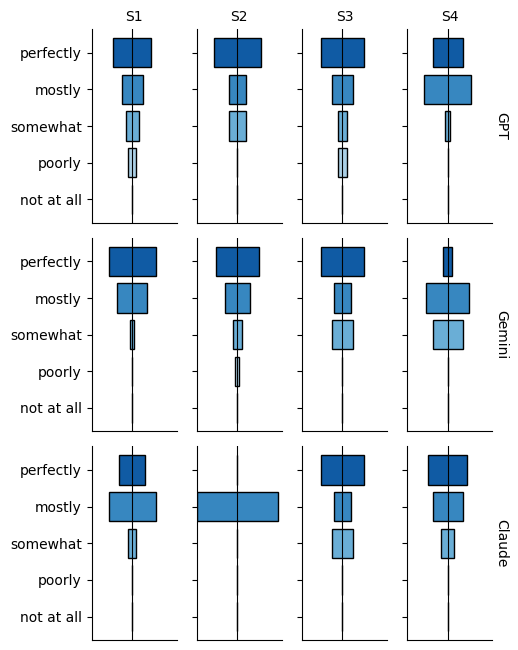

In [ ]:
# Normalize color palette (dark to light)
palette = sns.color_palette("Blues", n_colors=5)

# Faceted plot grid
g = sns.FacetGrid(df, row="Group", col="Statement", margin_titles=True, height=2.2, aspect=0.6)

def centered_barplot(data, color, **kwargs):
    # Sort levels from top to bottom
    data = data.set_index("Level").reindex(level_order).reset_index()
    counts = data["Count"].values
    total_width = np.max(counts)
    y_start = 0
    
    for i, (lvl, count) in enumerate(zip(data["Level"], counts)):
        bar_width = count
        center_offset = -bar_width / 2
        plt.barh(i, bar_width, left=center_offset, color=palette[i], edgecolor='black')

    plt.yticks(range(len(level_order)), level_order)
    plt.xticks([])
    plt.axvline(0, color='black', linewidth=0.8)
    plt.gca().invert_yaxis()

# Apply custom plotting function

g.map_dataframe(centered_barplot)
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_axis_labels("", "")

plt.tight_layout()
plt.show()

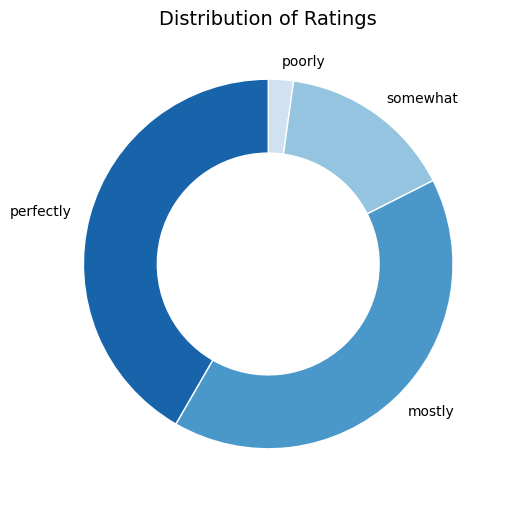

In [51]:
# Sample Likert level distribution (you can replace these with real values)
levels = ['perfectly', 'mostly', 'somewhat', 'poorly'][::-1]
counts = []
for i in range(2, 6):
    counts.append(GPT1_counts[i] + GPT2_counts[i] + GPT3_counts[i] + GPT4_counts[i] + Gemini1_counts[i] + Gemini2_counts[i] + Gemini3_counts[i] + Gemini4_counts[i] + Claude1_counts[i] + Claude2_counts[i] + Claude3_counts[i] + Claude4_counts[i])


# Create a blue color palette (light to dark)
colors = sns.color_palette("Blues", n_colors=len(counts))

# Create the donut chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts = ax.pie(
    counts,
    labels=levels,
    colors=colors,
    wedgeprops={'width': 0.4, 'edgecolor': 'white'},
    startangle=90,
    counterclock=False
)

# Add a hollow center
ax.set(aspect="equal")
plt.title("Distribution of Ratings", fontsize=14)
plt.show()
